I denna kunskapskontrollen har du ett dataset som heter "housing". <br>
Gör en utforskande analys där du t.ex. kan utföra visualiseringar, <br>
beräkningar samt bearbeta datan för att se om det exempelvis finns saknade värden i den. <br>
Målet är att man ska kunna läsa skriptet och följa din analys av datan. Exempelvis: Vilka hus är dyrare/billigare? Varför?


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("housing.csv")


# Display first few rows of the dataframe
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [72]:
# Display last few rows of the dataframe
print(df.tail())


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAN

In [73]:
# Summary statistics of the dataframe
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [74]:
# Information about the dataframe
df.info()
# 20640 observations in total
# 207 null values in the 'total_bedrooms' column
pd.isna(df).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


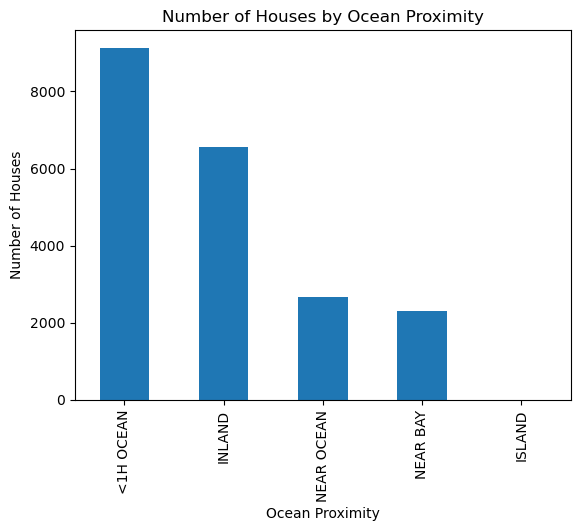

In [75]:
stats_ocean_proximity_counts = df['ocean_proximity'].value_counts()
print(stats_ocean_proximity_counts)
# Bar chart of ocean_proximity
stats_ocean_proximity_counts.plot(kind='bar')
plt.xlabel('Ocean Proximity')
plt.ylabel('Number of Houses')
plt.title('Number of Houses by Ocean Proximity')
plt.show()

In [76]:
# Count number of houses located on islands
stats_ocean_proximity_counts_island = df[df['ocean_proximity'] == 'ISLAND'].shape[0]
print(f"Number of houses located on islands: {stats_ocean_proximity_counts_island}")

Number of houses located on islands: 5


In [77]:
# statistics per ocean_proximity
grouped_stats = df.groupby('ocean_proximity').agg({
    'median_house_value': ['mean', 'median', 'min', 'max'],
    'total_bedrooms': ['mean', 'median', 'min', 'max'],
    'median_income': ['mean', 'median', 'min', 'max']
})
print(grouped_stats)

                median_house_value                                \
                              mean    median       min       max   
ocean_proximity                                                    
<1H OCEAN            240084.285464  214850.0   17500.0  500001.0   
INLAND               124805.392001  108500.0   14999.0  500001.0   
ISLAND               380440.000000  414700.0  287500.0  450000.0   
NEAR BAY             259212.311790  233800.0   22500.0  500001.0   
NEAR OCEAN           249433.977427  229450.0   22500.0  500001.0   

                total_bedrooms                       median_income           \
                          mean median    min     max          mean   median   
ocean_proximity                                                               
<1H OCEAN           546.539185  438.0    5.0  6445.0      4.230682  3.87500   
INLAND              533.881619  423.0    2.0  6210.0      3.208996  2.98770   
ISLAND              420.400000  512.0  214.0   591.0      2.

In [78]:
# Example: print mean median_house_value per ocean_proximity
stats_ocean_proximity_median_house_value = grouped_stats['median_house_value']['median']
print(stats_ocean_proximity_median_house_value)
stats_ocean_proximity_mean_house_value = grouped_stats['median_house_value']['mean']
print(stats_ocean_proximity_mean_house_value)
stats_ocean_proximity_median_income = grouped_stats['median_income']['median']
print(stats_ocean_proximity_median_income)
stats_ocean_proximity_mean_income = grouped_stats['median_income']['mean']
print(stats_ocean_proximity_mean_income)


ocean_proximity
<1H OCEAN     214850.0
INLAND        108500.0
ISLAND        414700.0
NEAR BAY      233800.0
NEAR OCEAN    229450.0
Name: median, dtype: float64
ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: mean, dtype: float64
ocean_proximity
<1H OCEAN     3.87500
INLAND        2.98770
ISLAND        2.73610
NEAR BAY      3.81865
NEAR OCEAN    3.64705
Name: median, dtype: float64
ocean_proximity
<1H OCEAN     4.230682
INLAND        3.208996
ISLAND        2.744420
NEAR BAY      4.172885
NEAR OCEAN    4.005785
Name: mean, dtype: float64


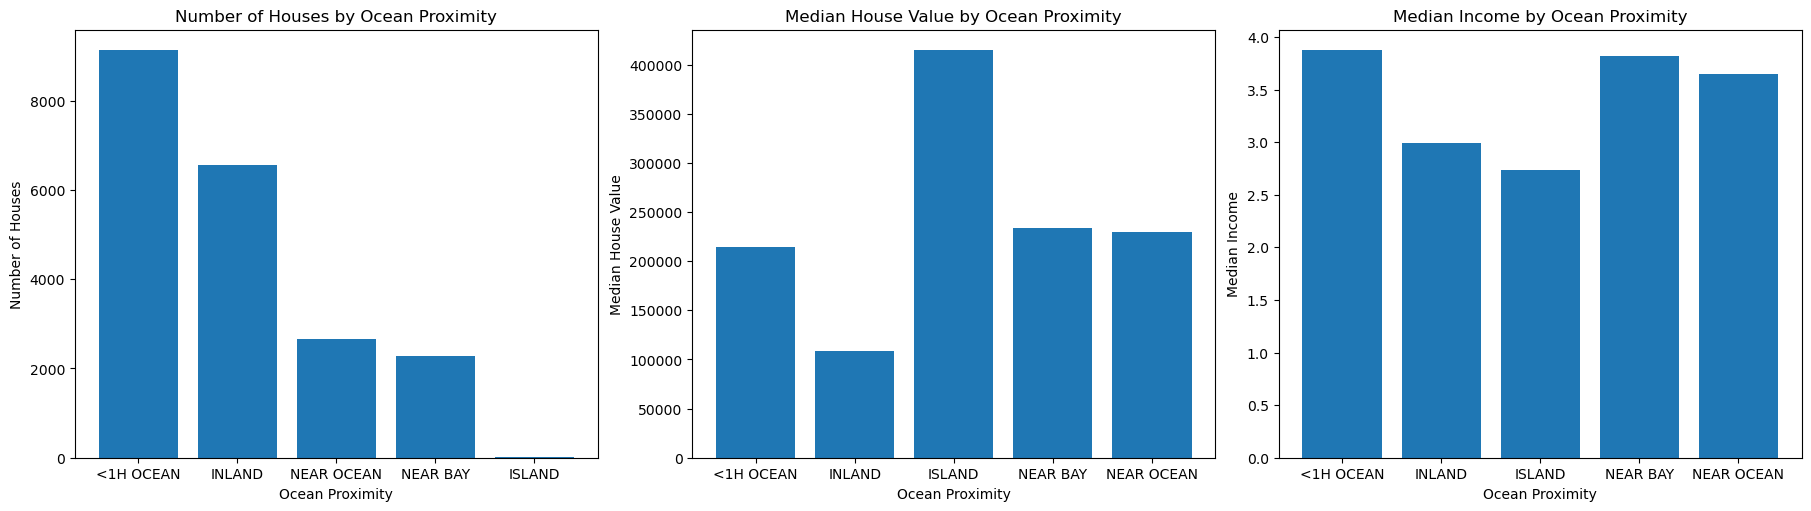

In [79]:
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(18, 5))
axs[0].bar(stats_ocean_proximity_counts.index, stats_ocean_proximity_counts.values)
axs[0].set_title('Number of Houses by Ocean Proximity')
axs[0].set_xlabel('Ocean Proximity')
axs[0].set_ylabel('Number of Houses')

axs[1].bar(stats_ocean_proximity_median_house_value.index, stats_ocean_proximity_median_house_value.values)
axs[1].set_title('Median House Value by Ocean Proximity')
axs[1].set_xlabel('Ocean Proximity')
axs[1].set_ylabel('Median House Value')

axs[2].bar(stats_ocean_proximity_median_income.index, stats_ocean_proximity_median_income.values)
axs[2].set_title('Median Income by Ocean Proximity')
axs[2].set_xlabel('Ocean Proximity')
axs[2].set_ylabel('Median Income')
plt.show()

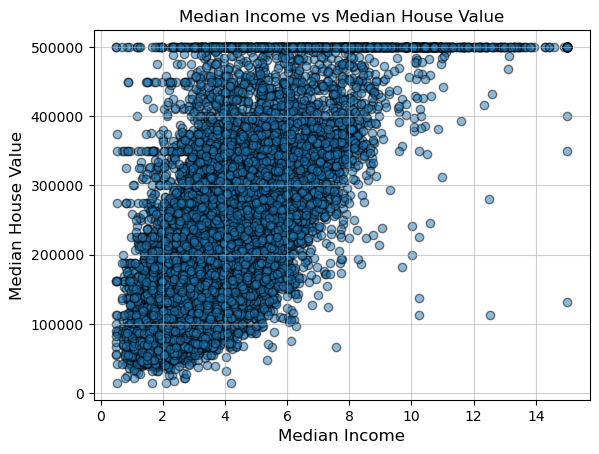

In [80]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5, edgecolors='k')
plt.title('Median Income vs Median House Value', fontsize=12)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True, alpha=0.6)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

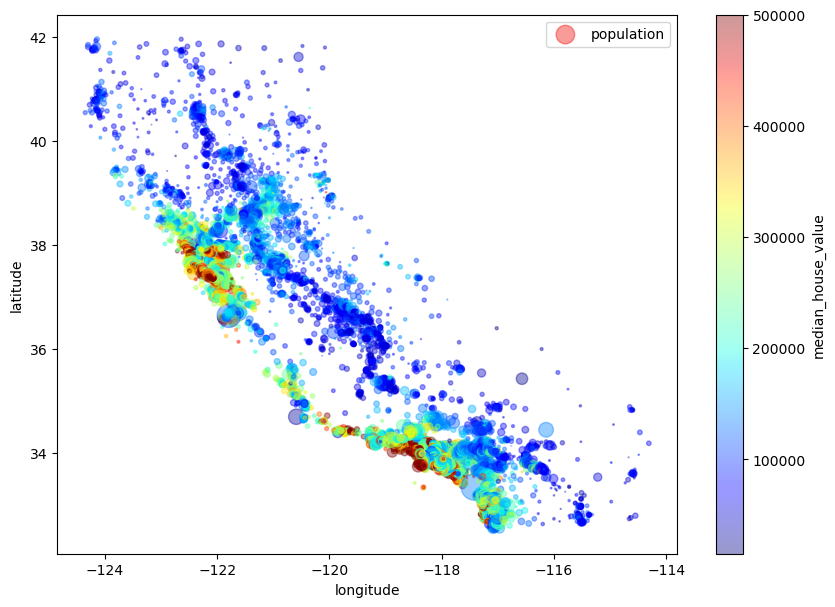

In [81]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', figsize=(10,7),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
       sharex=False)

I slutet av koden ska du genomföra en självutvärdering där du besvarar följande tre frågor:
1. Har något varit utmanande i kursen/kunskapskontrollerna? Om ja, hur har du hanterat det? Vilka lärdomar tar du med dig till framtida kurser?
Ans: kursen har ett väldigt högt tempo. Redan under den första veckan behövde jag prioritera andra saker, vilket gjorde att jag inte hann förbereda mig ordentligt genom att läsa allt material enligt kursplanen. Därför upplevde jag den första lektionen på fredagen som mycket tuff. Även under de följande veckorna kände jag en ständig press över att ligga efter och behöva komma ikapp. Jag lade då ner mycket tid och energi på att gå igenom allt kursmaterial igen och arbeta intensivt med uppgifterna, och först på senare tid har jag börjat känna att jag faktiskt hänger med i kursens tempo.<br>
Jag har lärt mig att det är viktigt att alltid kolla kursplanen direkt från början, redan på måndagen första kursveckan.<br>

2. Vilket betyg anser du att du ska ha och varför?
Ans: Jag är nöjd med betyget G och anser att det speglar mitt arbete. Jag har tagit mig igenom allt kursmaterial och slutfört alla uppgifter. Med mer tid hade jag gärna fördjupat mina kunskaper inom Python och de tre biblioteken.”

3. Något du vill lyfta fram till Terese?
Ans:  
   1. STack för mycket bra och väl genomförda lektioner, med en fin balans mellan genomgångar och grupparbete.
   2. Tack också för att ni delade PDF-filer ur matematikboken och kapitlet om Python när de beställda kursböckerna ännu inte hade hunnit komma fram – det uppskattades verkligen.
   3. Generellt upplever jag att kursen har ett mycket högt tempo. Det skulle vara bra att se över och eventuellt justera tempot. Jag har ganska många års erfarenhet av programmering men tyckte ändå att det ibland var svårt att hinna med. Jag kan tänka mig att det är ännu mer utmanande för deltagare med mindre programmeringsvana. 
   4. Det tog några dagar innan kursböckerna kom efter att beställningen lagts. Det vore bra om det redan i det första informationsbrevet från kursarrangören tydligt framgick vilka böcker som behöver köpas.

4. Sammanfattningsvis är jag väldigt tacksam för möjligheten att få gå den här kursen tillsammans med dig och övriga studenter. Jag önskar alla en riktigt god jul och ett gott nytt år!